# EASE-DGGS key features

You can try out vgridpandas by using the cloud-computing platforms below without having to install anything on your computer:

[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://vgridpandas.gishub.vn/lab/index.html?path=notebooks/06_ease.ipynb)
[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgridpandas/blob/master)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgridpandas/HEAD)

### Install vgridpandas

In [ ]:
# %pip install vgridpandas

### Latlong to EASE-DGGS

In [ ]:
import pandas as pd
from vgridpandas import easepandas
df = pd.DataFrame({'lat': [10.775299665325505, 10.775299665325505], 'lon':[106.70647975040788,-171.58256682775985]})
resolution = 5
df = df.ease.latlon2ease(resolution)
df

### EASE-DGGS to geo boundary

In [ ]:
df = df.ease.ease2geo()
df

### (Multi)Linestring/ (Multi)Polygon to EASE-DGGS

In [ ]:
from vgridpandas import easepandas
import geopandas as gpd

gdf = gpd.read_file('https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/shape/polygon.geojson')
resolution = 4
gdf_polyfill = gdf.ease.polyfill(resolution, predicate = "intersects", explode = False)
gdf_polyfill = gdf_polyfill.ease.ease2geo(ease_column = "ease_polyfill")
gdf_polyfill.plot()

### EASE-DGGS point binning

<Axes: >

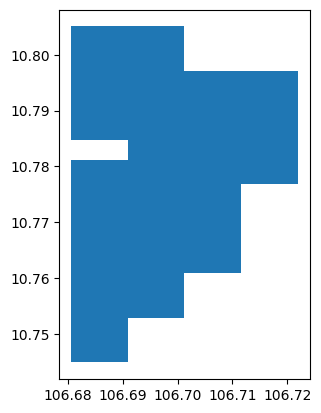

In [2]:
import pandas as pd
import geopandas as gpd
from vgridpandas import easepandas
resolution = 3
df = pd.read_csv("https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/csv/dist1_pois.csv")
# df = gpd.read_file("https://raw.githubusercontent.com/opengeoshub/vopendata/refs/heads/main/shape/dist1_pois.geojson")
df.head()
stats = "mean"
df_bin = df.ease.easebin(resolution=resolution, stats = stats, numeric_column="confidence",category_column="category",return_geometry=True)
df_bin.plot()